# Example Usage 
## Embedder
## Evaluator
## Graph_generator

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

from embedder import Embedder
from embedder import Model
from evaluator import Evaluator

from graph_generator import Graph_generator

### Generate graphs and split it

In [91]:
from load_data import load_data
graphs, labels = load_data("MUTAG")

# split the graphs and the labels
X_train, X_test, y_train, y_test = train_test_split(graphs, labels, test_size=0.3
                                                    , random_state=0)
y_test = [[i] for i in y_test]
y_test = np.ravel(y_test)
y_train = [[i] for i in y_train]
y_train = np.ravel(y_train)

### Import the models 

In [92]:
from sklearn.decomposition import TruncatedSVD
from eden import graph
import umap

# MUTAG
Using 3 models:  
1) Vectorize  
2) PCA to 1000  
3) UMAP to dim = {2,4,8,16,32,..}

The entrire porcedure is repeated 5 times

In [97]:
dim = np.logspace(1, 5, num=5, base=2)
accuracy = [[] for i in dim]
precision = [[] for i in dim]
recall = [[] for i in dim]
f1 = [[] for i in dim]
for k in range(0,5):
    print("loop number: ", k+1)
    pos = 0
    for d in dim:
        # dimension of the last embedding
        dimension_embedding = int(d)

        # instanziate first model
        eden = graph.Vectorizer(complexity = 2)
        model1 = Model(eden, has_fit = False)

        # instanziate second model
        pca = TruncatedSVD(n_components=1000)
        model2 = Model(pca)

        # instanziate third model
        uma = umap.UMAP(n_components=dimension_embedding)
        model3 = Model(uma)

        # fit and transform
        # mode1 --> model2 --> model3
        emb = Embedder(model1,model2,model3)
        X_small = emb.fit(X_train,y_train).transform(X_test)


        evaluator = Evaluator()
        acc, pre, rec, f = evaluator.performance_with_kfold(X_small,y_test)


        accuracy[pos] = accuracy[pos] + acc
        precision[pos] = precision[pos] + pre
        recall[pos] = recall[pos] + rec
        f1[pos] = f1[pos] + f
        
        pos = pos + 1


loop number:  1
loop number:  2
loop number:  3
loop number:  4
loop number:  5


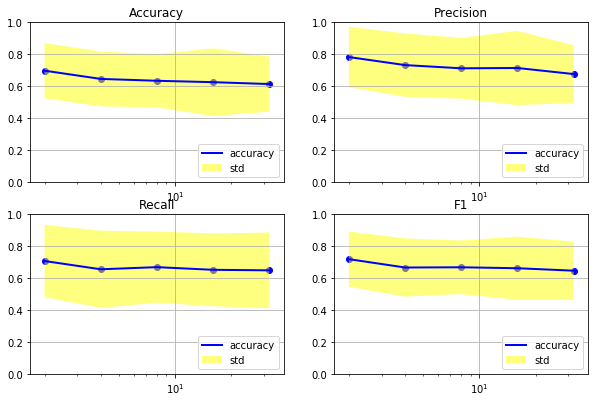

In [98]:
my_plot(accuracy,precision,recall,f1)

# Easy to separate Graphs

loop number:  1
loop number:  2
loop number:  3
loop number:  4
loop number:  5


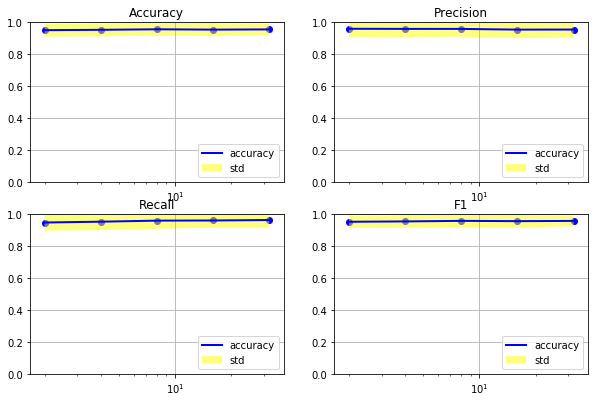

In [102]:
graphs, labels = Graph_generator.gen_set_easy(n_graphs = 1000,
                                              n_nodes = 5,
                                              prob_edge = 0.6,
                                              depth = 2)
# split the graphs and the labels
X_train, X_test, y_train, y_test = train_test_split(graphs, labels, test_size=0.3
                                                    , random_state=0)
y_test = [[i] for i in y_test]
y_test = np.ravel(y_test)
y_train = [[i] for i in y_train]
y_train = np.ravel(y_train)

dim = np.logspace(1, 5, num=5, base=2)
accuracy = [[] for i in dim]
precision = [[] for i in dim]
recall = [[] for i in dim]
f1 = [[] for i in dim]

for k in range(0,5):
    print("loop number: ", k+1)
    pos = 0
    for d in dim:
        # dimension of the last embedding
        dimension_embedding = int(d)

        # instanziate first model
        eden = graph.Vectorizer(complexity = 2)
        model1 = Model(eden, has_fit = False)

        # instanziate second model
        pca = TruncatedSVD(n_components=1000)
        model2 = Model(pca)

        # instanziate third model
        uma = umap.UMAP(n_components=dimension_embedding)
        model3 = Model(uma)

        # fit and transform
        # mode1 --> model2 --> model3
        emb = Embedder(model1,model2,model3)
        X_small = emb.fit(X_train,y_train).transform(X_test)


        evaluator = Evaluator()
        acc, pre, rec, f = evaluator.performance_with_kfold(X_small,y_test)


        accuracy[pos] = accuracy[pos] + acc
        precision[pos] = precision[pos] + pre
        recall[pos] = recall[pos] + rec
        f1[pos] = f1[pos] + f
        
        pos = pos + 1

my_plot(accuracy,precision,recall,f1)

# Hard to separate graphs

loop number:  1
loop number:  2
loop number:  3
loop number:  4
loop number:  5


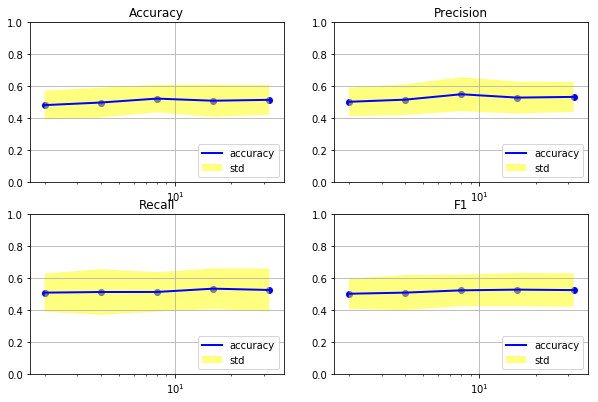

In [103]:
graphs, labels = Graph_generator.gen_set_hard(n_graphs = 1000,
                                              n_nodes = 5,
                                              prob_edge = 0.6,
                                              depth = 2)
# split the graphs and the labels
X_train, X_test, y_train, y_test = train_test_split(graphs, labels, test_size=0.3
                                                    , random_state=0)
y_test = [[i] for i in y_test]
y_test = np.ravel(y_test)
y_train = [[i] for i in y_train]
y_train = np.ravel(y_train)

dim = np.logspace(1, 5, num=5, base=2)
accuracy = [[] for i in dim]
precision = [[] for i in dim]
recall = [[] for i in dim]
f1 = [[] for i in dim]

for k in range(0,5):
    print("loop number: ", k+1)
    pos = 0
    for d in dim:
        # dimension of the last embedding
        dimension_embedding = int(d)

        # instanziate first model
        eden = graph.Vectorizer(complexity = 2)
        model1 = Model(eden, has_fit = False)

        # instanziate second model
        pca = TruncatedSVD(n_components=1000)
        model2 = Model(pca)

        # instanziate third model
        uma = umap.UMAP(n_components=dimension_embedding)
        model3 = Model(uma)

        # fit and transform
        # mode1 --> model2 --> model3
        emb = Embedder(model1,model2,model3)
        X_small = emb.fit(X_train,y_train).transform(X_test)


        evaluator = Evaluator()
        acc, pre, rec, f = evaluator.performance_with_kfold(X_small,y_test)


        accuracy[pos] = accuracy[pos] + acc
        precision[pos] = precision[pos] + pre
        recall[pos] = recall[pos] + rec
        f1[pos] = f1[pos] + f
        
        pos = pos + 1

my_plot(accuracy,precision,recall,f1)

In [81]:
def my_plot(accuracy,precision,recall,f1):
    acc_mean, acc_std = mean_std(accuracy)
    pre_mean, pre_std = mean_std(precision)
    rec_mean, rec_std = mean_std(recall)
    f1_mean, f1_std = mean_std(f1)

    plt.figure(1, figsize=(10,10))

    plt.subplot(321)
    plt.title("Accuracy")
    # the 1 sigma upper and lower analytic population bounds
    lower_bound = acc_mean - acc_std
    upper_bound = acc_mean + acc_std

    plt.semilogx(dim, acc_mean, lw=2, label='accuracy', color='blue')
    plt.scatter(dim, acc_mean, color='blue')
    plt.fill_between(dim, lower_bound, upper_bound, facecolor='yellow', alpha=0.5,
                    label='std')
    plt.legend(loc='lower right')
    m = min(acc_mean)-max(acc_std)
    plt.ylim(0,1)
    plt.grid()



    plt.subplot(322)
    plt.title("Precision")
    # the 1 sigma upper and lower analytic population bounds
    lower_bound = pre_mean - pre_std
    upper_bound = pre_mean + pre_std

    plt.semilogx(dim, pre_mean, lw=2, label='accuracy', color='blue')
    plt.scatter(dim, pre_mean, color='blue')
    plt.fill_between(dim, lower_bound, upper_bound, facecolor='yellow', alpha=0.5,
                    label='std')
    plt.legend(loc='lower right')
    m = min(pre_mean)-max(pre_std)
    plt.ylim(0,1)
    plt.grid()


    plt.subplot(323)
    plt.title("Recall")
    lower_bound = rec_mean - rec_std
    upper_bound = rec_mean + rec_std

    plt.semilogx(dim, rec_mean, lw=2, label='accuracy', color='blue')
    plt.scatter(dim, rec_mean, color='blue')
    plt.fill_between(dim, lower_bound, upper_bound, facecolor='yellow', alpha=0.5,
                    label='std')
    plt.legend(loc='lower right')
    m = min(rec_mean)-max(rec_std)
    plt.ylim(0,1)
    plt.grid()

    plt.subplot(324)
    plt.title("F1")
    lower_bound = f1_mean - f1_std
    upper_bound = f1_mean + f1_std

    plt.semilogx(dim, f1_mean, lw=2, label='accuracy', color='blue')
    plt.scatter(dim, f1_mean, color='blue')
    plt.fill_between(dim, lower_bound, upper_bound, facecolor='yellow', alpha=0.5,
                    label='std')
    plt.legend(loc='lower right')
    m = min(f1_mean)-max(f1_std)
    plt.ylim(0,1)
    plt.grid()

    
def mean_std(metric):
    mean_res = []
    std_res = []
    for i in metric:
        mean_res.append(np.mean(i))
        std_res.append(np.std(i))
    
    mean_res = np(mean_res)
    std_res = np(std_res)
        
    return (mean_res, std_res)
    